In [14]:
# add modules folder to Python's search path
from os import times
import sys
from pathlib import Path
from os.path import dirname, realpath, abspath
script_dir = Path(abspath(''))#Path(dirname(realpath(__file__)))
module_dir = str(script_dir.parent.parent)
sys.path.insert(0, module_dir + '/modules')
print(module_dir)
import task
import methods
import utility as ut
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.decomposition
import matplotlib.ticker as ticker
from sklearn.manifold import TSNE
from sklearn.utils import shuffle

C:\Users\pinak\Documents\GitHub\NMA


In [51]:
db_path = '../../data/hcp_task'
save_folder = 'story_1'
@ut.timer
def score_plot(max_comps=100, k_folds=8, **svm_params):
    score_dict = {'score': [], 'n_comps': [], 'wm_task': []}
    for wm_task in ['0bk', '2bk']:
        conditions = [wm_task + '_' + condition for condition in ['body', 'faces', 'places', 'tools']]
        group = task.Group(db_path)
        data, labels = group.extract_cons(conditions, remove_mean=True)
        for comp in range(max_comps+1):
            print('Working on {} task with n_comps = {}'.format(wm_task, comp), end='\r')
            new_data = sklearn.decomposition.PCA(n_components=comp).fit_transform(data.reshape(data.shape[0], -1))
            svm = methods.SVM(kernel='rbf', **svm_params)
            score_dict['score'] += list(svm.cross_val(new_data, labels, k_folds) * 100.0)
            score_dict['n_comps'] += [comp] * k_folds 
            score_dict['wm_task'] += [wm_task] * k_folds
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    df = pd.DataFrame.from_dict(score_dict)
    sns.pointplot(x='n_comps', y='score', hue='wm_task', data=df, ax=ax)
    ax.set_ylabel('SVM accuracy (%)', fontsize=20)
    ax.set_xlabel('number of principal components', fontsize=20)    
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    ax.xaxis.set_major_locator(ticker.FixedLocator(list(range(0, max_comps+1, 5))))
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
    plt.legend(fontsize=15)
    plt.savefig(save_folder + '/svm_scores.png')
    plt.show()
    df.to_csv(save_folder + '/svm_scores.csv', index=None)
    return df

Time taken by extract_con is 1.432276725769043 seconds
Time taken by extract_con is 1.2414405345916748 seconds
Time taken by extract_con is 1.27500319480896 seconds
Time taken by extract_con is 1.2865610122680664 seconds
Time taken by extract_cons is 5.370917320251465 seconds
Time taken by massive_shuffle is 0.05285763740539551 seconds
Time taken by cross_val is 0.06383156776428223 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(1186, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(1186, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(1186, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\P

Time taken by massive_shuffle is 0.03789806365966797 seconds
Time taken by cross_val is 0.431140661239624 seconds
Time taken by massive_shuffle is 0.033910512924194336 seconds
Time taken by cross_val is 0.43284153938293457 seconds
Time taken by massive_shuffle is 0.03590250015258789 seconds
Time taken by cross_val is 0.4299185276031494 seconds
Time taken by extract_con is 1.4772660732269287 seconds
Time taken by extract_con is 1.3744211196899414 seconds
Time taken by extract_con is 1.2880327701568604 seconds
Time taken by extract_con is 1.2925746440887451 seconds
Time taken by extract_cons is 5.570951461791992 seconds
Time taken by massive_shuffle is 0.04388689994812012 seconds
Time taken by cross_val is 0.052861928939819336 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(1186, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(1186, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(1186, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\P

Time taken by massive_shuffle is 0.03191518783569336 seconds
Time taken by cross_val is 0.43146538734436035 seconds
Time taken by massive_shuffle is 0.03390169143676758 seconds
Time taken by cross_val is 0.4292564392089844 seconds
Time taken by massive_shuffle is 0.04288482666015625 seconds
Time taken by cross_val is 0.4996645450592041 seconds


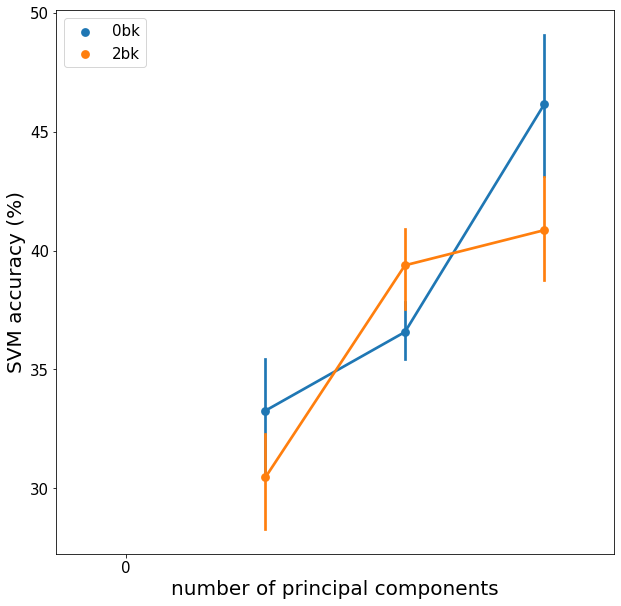

Time taken by score_plot is 45.1367461681366 seconds


,score,n_comps,wm_task
0,NaN,0,0bk
1,NaN,0,0bk
2,NaN,0,0bk
3,NaN,0,0bk
4,NaN,0,0bk
...,...,...,...
59,42.941176,3,2bk
60,40.236686,3,2bk
61,44.970414,3,2bk
62,46.745562,3,2bk


In [52]:
score_plot(max_comps=3, k_folds=8, gamma=1e-9, C=1.0)

In [65]:
@ut.timer
def tsne(perplexity, pca_comps=10):
    for wm_task in ['0bk', '2bk']:
        conditions = [wm_task + '_' + condition for condition in ['body', 'faces', 'places', 'tools']]
        group = task.Group(db_path)
        data, labels = group.extract_cons(conditions, remove_mean=True)
        #data = group.squash_frames(data)
        if pca_comps is not None:
            X = sklearn.decomposition.PCA(n_components=pca_comps).fit_transform(data.reshape(data.shape[0], -1))
        else:
            X = data.reshape(data.shape[0], -1)
        X = TSNE(n_components=2, perplexity=perplexity).fit_transform(X)
        X = TSNE(n_components=2, perplexity=perplexity).fit_transform(data.reshape(data.shape[0], -1))
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111)
        colors = ['#ff6f69', '#00b159', '#eb6841', '#0e9aa7']
        for i in range(4):
            idx = list(range(i*group.n_subjects, (i+1)*group.n_subjects))
            x = X[idx]
            ax.scatter(x[:, 0], x[:, 1], c=colors[i], label=conditions[i])
        ax.set_xlabel('t-SNE 1st component', fontsize=20)
        ax.set_ylabel('t-SNE 2nd component', fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.tick_params(axis='both', which='minor', labelsize=15)
        plt.legend(fontsize=15)
        plt.savefig(save_folder + '/tsne_{}_{}.png'.format(wm_task, pca_comps if pca_comps is not None else ''))
        plt.show()

In [ ]:
tsne(50, 10)

Time taken by extract_con is 1.5261704921722412 seconds
Time taken by extract_con is 1.294428825378418 seconds
Time taken by extract_con is 1.2248811721801758 seconds
Time taken by extract_con is 1.2665355205535889 seconds
Time taken by extract_cons is 5.505495548248291 seconds
